### Load Precomputed Data Objects for each Dataset

In [1]:
import os
import pickle

from do_GEOM import GEOM
from do_QM9 import QM9
from do_PDBBIND import PDBBIND
from do_BINDINGMOAD import BINDINGMOAD
from do_CROSSDOCKED import CROSSDOCKED

In [2]:
# geom_data_object_pkl            = 'data_object_cache/GEOM_C1_data_object.pkl'
geom_data_object_pkl            = 'data_object_cache/GEOM_C30_data_object.pkl'
# qm9_data_object_pkl             = 'data_object_cache/QM9_data_object.pkl'
pdbbind_ligand_data_object_pkl  = 'data_object_cache/PDBBIND_LIGAND_data_object.pkl'
pdbbind_pocket_data_object_pkl  = 'data_object_cache/PDBBIND_POCKET_data_object.pkl'
# pdbbind_protein_data_object_pkl = 'data_object_cache/PDBBIND_PROTEIN_data_object.pkl'
# joined_geom_qm9_data_object_pkl = 'data_object_cache/JOINED_GEOM_QM9_data_object.pkl'
moad_ligand_data_object_pkl     = 'data_object_cache/BINDINGMOAD_LIGAND_data_object.pkl'
moad_pocket_data_object_pkl     = 'data_object_cache/BINDINGMOAD_POCKET_10.0A_data_object.pkl'
crossd_ligand_data_object_pkl   = 'data_object_cache/CROSSDOCKED_LIGAND_data_object.pkl'
crossd_pocket_data_object_pkl   = 'data_object_cache/CROSSDOCKED_POCKET_10.0A_data_object.pkl'

with open(geom_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    geom_data_obj = pickle.load(file)

# with open(qm9_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
#     qm9_data_obj = pickle.load(file)

with open(pdbbind_ligand_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    pdbbind_ligand_data_obj = pickle.load(file)

with open(pdbbind_pocket_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    pdbbind_pocket_data_obj = pickle.load(file)

with open(moad_ligand_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    moad_ligand_data_obj = pickle.load(file)

with open(moad_pocket_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    moad_pocket_data_obj = pickle.load(file)

with open(crossd_ligand_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    crossd_ligand_data_obj = pickle.load(file)

with open(crossd_pocket_data_object_pkl, 'rb') as file:  # Use 'rb' mode for binary reading
    crossd_pocket_data_obj = pickle.load(file)


In [3]:
# print(f"QM9        : {qm9_data_obj.mol_count}")
print(f"GEOM       : {geom_data_obj.mol_count}")

print(f"PDBB-LG    : {pdbbind_ligand_data_obj.mol_count}")
print(f"PDBB-PKT   : {pdbbind_pocket_data_obj.mol_count}")

print(f"MOAD-LG    : {moad_ligand_data_obj.mol_count}")
print(f"MOAD-PKT   : {moad_pocket_data_obj.mol_count}")

print(f"CrossD-LG  : {crossd_ligand_data_obj.mol_count}")
print(f"CrossD-PKT : {crossd_pocket_data_obj.mol_count}")

GEOM       : 6922516
PDBB-LG    : 19728
PDBB-PKT   : 19728
MOAD-LG    : 79029
MOAD-PKT   : 79029
CrossD-LG  : 100030
CrossD-PKT : 100030


### View each atom's frequencies in each dataset

In [4]:
from constants import get_periodictable_list
an2s, s2an = get_periodictable_list()


all_unique_atoms = list(set(
    # list(qm9_data_obj.atomic_num_freq.keys()) + \
    list(geom_data_obj.atomic_num_freq.keys()) + \
    list(pdbbind_ligand_data_obj.atomic_num_freq.keys()) + \
    list(moad_ligand_data_obj.atomic_num_freq.keys()) + \
    list(crossd_ligand_data_obj.atomic_num_freq.keys()) + \
    list(pdbbind_pocket_data_obj.atomic_num_freq.keys()) + \
    list(moad_pocket_data_obj.atomic_num_freq.keys()) + \
    list(crossd_pocket_data_obj.atomic_num_freq.keys())
))
all_unique_atoms_symbols = [str(an2s[int(an)]) for an in all_unique_atoms]

list_of_all_dicts = [
    # qm9_data_obj.atomic_num_freq, \
    geom_data_obj.atomic_num_freq, \
    pdbbind_ligand_data_obj.atomic_num_freq, \
    moad_ligand_data_obj.atomic_num_freq, \
    crossd_ligand_data_obj.atomic_num_freq, \
    pdbbind_pocket_data_obj.atomic_num_freq, \
    moad_pocket_data_obj.atomic_num_freq, \
    crossd_pocket_data_obj.atomic_num_freq
]

# list_of_all_dicts_names = ['QM9', 'GEOM', 'PDBB-LG', 'MOAD-LG', 'CrossD-LG', 'PDBB-PKT', 'MOAD-PKT', 'CrossD-PKT']
list_of_all_dicts_names = [None, 'GEOM', 'PDBB-LG', 'MOAD-LG', 'CrossD-LG', 'PDBB-PKT', 'MOAD-PKT', 'CrossD-PKT']

# colors = ['skyblue', 'salmon', 'green', 'blue', 'magenta', 'purple', 'orange', 'red']
colors = [None, 'salmon', 'green', 'blue', 'magenta', 'purple', 'orange', 'red']


In [5]:
import os

if not os.path.exists(os.path.join(os.getcwd(), 'outputs')):
    os.makedirs(os.path.join(os.getcwd(), 'outputs'))

In [6]:
# ! pip install prettytable
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Keys'] + all_unique_atoms_symbols

# populate table rows
for dictionary, name in zip(list_of_all_dicts, list_of_all_dicts_names[1:]):
    values = [dictionary.get(key, 0) for key in all_unique_atoms]
    # values = [int(dictionary.get(key, 0) > 0) for key in all_unique_atoms]
    table.add_row([name] + values)

# align all columns to the right
for field in table.field_names:
    table.align[field] = 'r'

print(table)

# save to txt file
with open('outputs/atom_freq.txt', 'w') as f:
    print(table, file=f)


+------------+-----------+----+-----+-----------+----------+----------+---------+-----+------+----+-----+-------+---------+---------+----+-----+---+-----+-----+-----+----+----+------+----+----+-----+--------+----+----+----+----+----+----+----+------+----+----+----+----+----+----+----+
|       Keys |         H | Be |   B |         C |        N |        O |       F |  Na |   Mg | Al |  Si |     P |       S |      Cl |  K |  Ca | V |  Mn |  Fe |  Co | Ni | Cu |   Zn | Ga | As |  Se |     Br | Rb | Sr | Ru | Rh | Cd | Sb | Te |    I | Cs | Re | Os | Ir | Pt | Hg | Bi |
+------------+-----------+----+-----+-----------+----------+----------+---------+-----+------+----+-----+-------+---------+---------+----+-----+---+-----+-----+-----+----+----+------+----+----+-----+--------+----+----+----+----+----+----+----+------+----+----+----+----+----+----+----+
|       GEOM | 143905848 |  0 | 290 | 129988623 | 20266722 | 21669359 | 1481844 |   0 |    0 |  1 | 250 | 36290 | 3999872 | 1224394 |  0 |   0

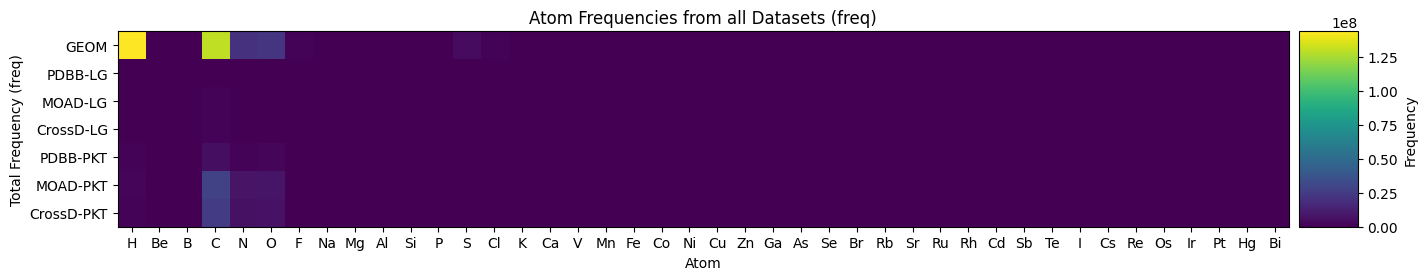

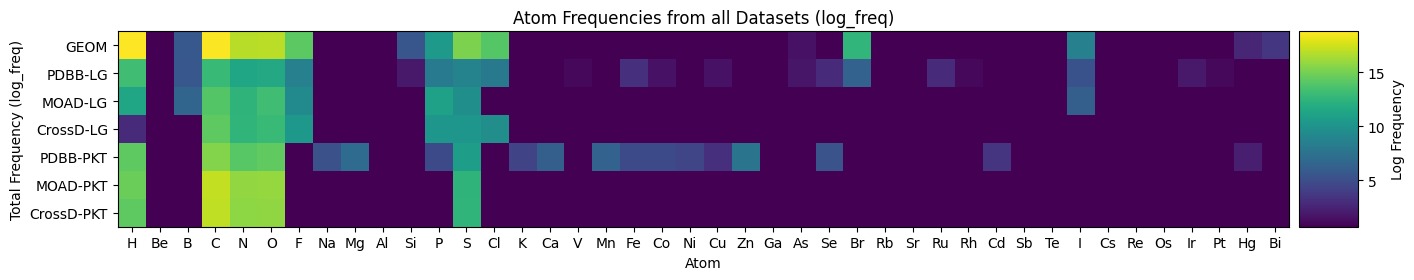

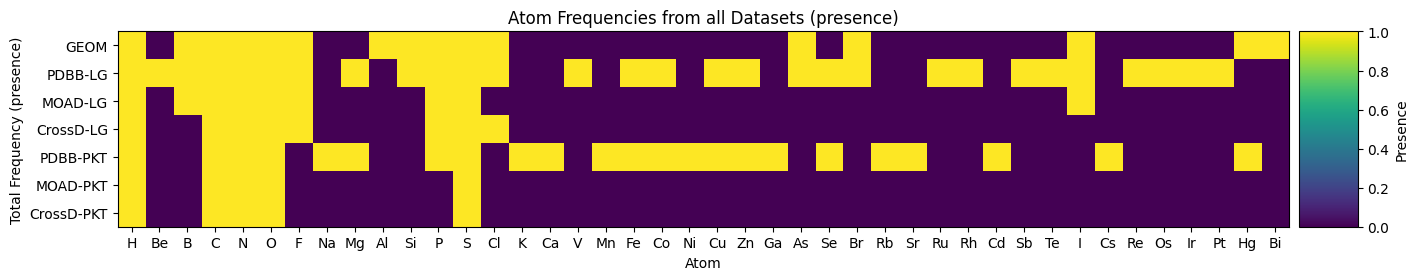

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_atom_freq_heatmap(mode='presence', img_save_path=''):
    matrix = []
    for dictionary in list_of_all_dicts:
        if mode == 'freq':
            row = [dictionary.get(key, 0) for key in all_unique_atoms]
        elif mode == 'log_freq':
            row = [math.log(dictionary.get(key, 1) + 1) for key in all_unique_atoms]
        elif mode == 'presence':
            row = [int(dictionary.get(key, 0) > 0) for key in all_unique_atoms]
        matrix.append(row)

    matrix = np.array(matrix)

    fig, ax = plt.subplots(figsize=(16, 12))
    im = ax.imshow(matrix, cmap='viridis', interpolation='nearest')

    ax.set_xticks(np.arange(len(all_unique_atoms_symbols)))
    ax.set_xticklabels(all_unique_atoms_symbols)
    ax.set_yticks(np.arange(len(list_of_all_dicts)))
    ax.set_yticklabels(list_of_all_dicts_names[1:])
    ax.set_xlabel('Atom')
    ax.set_ylabel(f'Total Frequency ({mode})')
    ax.set_title(f'Atom Frequencies from all Datasets ({mode})')

    # Create an axes on the right side of ax. The width of cax will be 5% of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Frequency' if mode == 'freq' else 'Log Frequency' if mode == 'log_freq' else 'Presence')

    plt.savefig(img_save_path)
    plt.show()


plot_atom_freq_heatmap(mode='freq', img_save_path='outputs/atom_freq.png')
plot_atom_freq_heatmap(mode='log_freq', img_save_path='outputs/atom_freq_log_scale.png')
plot_atom_freq_heatmap(mode='presence', img_save_path='outputs/atom_freq_presence.png')

### Number of Atoms per Molecule Stats

In [8]:
from utils import get_min_max_mean_std

data_num_atoms = [
    # qm9_data_obj.num_atoms,
    None,
    geom_data_obj.num_atoms,
    pdbbind_ligand_data_obj.num_atoms,
    moad_ligand_data_obj.num_atoms,
    crossd_ligand_data_obj.num_atoms,
    pdbbind_pocket_data_obj.num_atoms,
    moad_pocket_data_obj.num_atoms,
    crossd_pocket_data_obj.num_atoms
]

data_num_atoms_no_H = [
    # qm9_data_obj.num_atoms_no_H,
    None,
    geom_data_obj.num_atoms_no_H,
    pdbbind_ligand_data_obj.num_atoms_no_H,
    moad_ligand_data_obj.num_atoms_no_H,
    crossd_ligand_data_obj.num_atoms_no_H,
    pdbbind_pocket_data_obj.num_atoms_no_H,
    moad_pocket_data_obj.num_atoms_no_H,
    crossd_pocket_data_obj.num_atoms_no_H
]


min_mean_max_std_table = get_min_max_mean_std(data_num_atoms[1:], list_of_all_dicts_names[1:])
print(min_mean_max_std_table)
# save to txt file
with open('outputs/num_atom_min_mean_max_std.txt', 'w') as f:
    print(min_mean_max_std_table, file=f)

min_mean_max_std_table_no_H = get_min_max_mean_std(data_num_atoms_no_H[1:], list_of_all_dicts_names[1:])
print(min_mean_max_std_table_no_H)
# save to txt file
with open('outputs/num_atom_min_mean_max_std_no_H.txt', 'w') as f:
    print(min_mean_max_std_table_no_H, file=f)

min_mean_max_std_table_pkt_num_resi = get_min_max_mean_std([moad_pocket_data_obj.num_resi, crossd_pocket_data_obj.num_resi], ['MOAD-PKT', 'CrossD-PKT'])
print(min_mean_max_std_table_pkt_num_resi)
with open('outputs/pkt_num_resi_min_mean_max_std.txt', 'w') as f:
    print(min_mean_max_std_table_pkt_num_resi, file=f)

+------------+-----+-------+------+-------+
|            | Min |  Mean |  Max |   Std |
+------------+-----+-------+------+-------+
|       GEOM |   3 |  46.6 |  181 |  10.4 |
|    PDBB-LG |   6 |  61.0 |  368 |  44.7 |
|    MOAD-LG |   1 |  27.1 |  177 |  15.1 |
|  CrossD-LG |   3 |  23.6 |  106 |   8.8 |
|   PDBB-PKT |  49 | 495.8 | 1333 | 128.8 |
|   MOAD-PKT |   5 | 587.5 | 2888 | 239.6 |
| CrossD-PKT |  11 | 409.7 | 1719 | 120.0 |
+------------+-----+-------+------+-------+
+------------+-----+-------+------+-------+
|            | Min |  Mean |  Max |   Std |
+------------+-----+-------+------+-------+
|       GEOM |   1 |  25.9 |   91 |   5.3 |
|    PDBB-LG |   4 |  32.9 |  224 |  21.8 |
|    MOAD-LG |   1 |  25.9 |  140 |  13.5 |
|  CrossD-LG |   3 |  23.6 |  106 |   8.8 |
|   PDBB-PKT |  35 | 413.3 | 1089 | 106.9 |
|   MOAD-PKT |   5 | 555.1 | 1428 | 171.4 |
| CrossD-PKT |  11 | 393.9 | 1408 |  90.8 |
+------------+-----+-------+------+-------+
+------------+-----+------+-----

In [9]:
# from utils import plot_histogram

# # plot_histogram(data_list=qm9_data_obj.num_atoms, color=colors[0], label=list_of_all_dicts_names[0], xlabel='num of atoms per molecule', title='QM9 num of atoms per molecule', img_save_path='outputs/num_atom_hist_QM9.png')
# plot_histogram(data_list=geom_data_obj.num_atoms, color=colors[1], label=list_of_all_dicts_names[1], xlabel='num of atoms per molecule', title='GEOM num of atoms per molecule', img_save_path='outputs/num_atom_hist_GEOM.png')

# plot_histogram(data_list=pdbbind_ligand_data_obj.num_atoms, color=colors[2], label=list_of_all_dicts_names[2], xlabel='num of atoms per molecule', title='PDBB-LG num of atoms per molecule', img_save_path='outputs/num_atom_hist_PDBB-LG.png')
# plot_histogram(data_list=pdbbind_pocket_data_obj.num_atoms, color=colors[3], label=list_of_all_dicts_names[3], xlabel='num of atoms per molecule', title='MOAD-LG num of atoms per molecule', img_save_path='outputs/num_atom_hist_MOAD-LG.png')
# plot_histogram(data_list=moad_ligand_data_obj.num_atoms, color=colors[4], label=list_of_all_dicts_names[4], xlabel='num of atoms per molecule', title='CrossD-LG num of atoms per molecule', img_save_path='outputs/num_atom_hist_CrossD-LG.png')

# plot_histogram(data_list=moad_pocket_data_obj.num_atoms, color=colors[5], label=list_of_all_dicts_names[5], xlabel='num of atoms per molecule', title='PDBB-PKT num of atoms per molecule', img_save_path='outputs/num_atom_hist_PDBB-PKT.png')
# plot_histogram(data_list=crossd_ligand_data_obj.num_atoms, color=colors[6], label=list_of_all_dicts_names[6], xlabel='num of atoms per molecule', title='MOAD-PKT num of atoms per molecule', img_save_path='outputs/num_atom_hist_MOAD-PKT.png')
# plot_histogram(data_list=crossd_pocket_data_obj.num_atoms, color=colors[7], label=list_of_all_dicts_names[7], xlabel='num of atoms per molecule', title='CrossD-PKT num of atoms per molecule', img_save_path='outputs/num_atom_hist_CrossD-PKT.png')

In [10]:
# from utils import plot_histogram

# # plot_histogram(data_list=qm9_data_obj.num_atoms_no_H, color=colors[0], label=list_of_all_dicts_names[0], xlabel='num of atoms per molecule (no_H)', title='QM9 num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_QM9_no_H.png')
# plot_histogram(data_list=geom_data_obj.num_atoms_no_H, color=colors[1], label=list_of_all_dicts_names[1], xlabel='num of atoms per molecule (no_H)', title='GEOM num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_GEOM_no_H.png')

# plot_histogram(data_list=pdbbind_ligand_data_obj.num_atoms_no_H, color=colors[2], label=list_of_all_dicts_names[2], xlabel='num of atoms per molecule (no_H)', title='PDBB-LG num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_PDBB-LG_no_H.png')
# plot_histogram(data_list=pdbbind_pocket_data_obj.num_atoms_no_H, color=colors[3], label=list_of_all_dicts_names[3], xlabel='num of atoms per molecule (no_H)', title='MOAD-LG num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_MOAD-LG_no_H.png')
# plot_histogram(data_list=moad_ligand_data_obj.num_atoms_no_H, color=colors[4], label=list_of_all_dicts_names[4], xlabel='num of atoms per molecule (no_H)', title='CrossD-LG num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_CrossD-LG_no_H.png')

# plot_histogram(data_list=moad_pocket_data_obj.num_atoms_no_H, color=colors[5], label=list_of_all_dicts_names[5], xlabel='num of atoms per molecule (no_H)', title='PDBB-PKT num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_PDBB-PKT_no_H.png')
# plot_histogram(data_list=crossd_ligand_data_obj.num_atoms_no_H, color=colors[6], label=list_of_all_dicts_names[6], xlabel='num of atoms per molecule (no_H)', title='MOAD-PKT num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_MOAD-PKT_no_H.png')
# plot_histogram(data_list=crossd_pocket_data_obj.num_atoms_no_H, color=colors[7], label=list_of_all_dicts_names[7], xlabel='num of atoms per molecule (no_H)', title='CrossD-PKT num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_CrossD-PKT_no_H.png')

In [11]:
# # this might take some time (PDBB-PTN)

# from utils import plot_combined_histogram

# plot_combined_histogram(data_num_atoms[1:], colors[1:], list_of_all_dicts_names[1:], title='Num of atoms per molecule', xlabel='num of atoms per molecule', img_save_path='outputs/num_atom_hist_ALL.png', log=True)
# plot_combined_histogram(data_num_atoms_no_H[1:], colors[1:], list_of_all_dicts_names[1:], title='Num of atoms per molecule (no_H)', xlabel='num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_ALL_no_H.png', log=True)

# plot_combined_histogram(data_num_atoms[2:5], colors[2:5], list_of_all_dicts_names[2:5], title='Num of atoms per molecule (LG only)', xlabel='num of atoms per molecule', img_save_path='outputs/num_atom_hist_LG_only.png', log=True)
# plot_combined_histogram(data_num_atoms_no_H[2:5], colors[2:5], list_of_all_dicts_names[2:5], title='Num of atoms per molecule (LG only, no_H)', xlabel='num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_LG_only_no_H.png', log=True)

# plot_combined_histogram(data_num_atoms[5:], colors[5:], list_of_all_dicts_names[5:], title='Num of atoms per molecule (PKT only)', xlabel='num of atoms per molecule', img_save_path='outputs/num_atom_hist_PKT_only.png', log=True)
# plot_combined_histogram(data_num_atoms_no_H[5:], colors[5:], list_of_all_dicts_names[5:], title='Num of atoms per molecule (PKT only, no_H)', xlabel='num of atoms per molecule (no_H)', img_save_path='outputs/num_atom_hist_PKT_only_no_H.png', log=True)

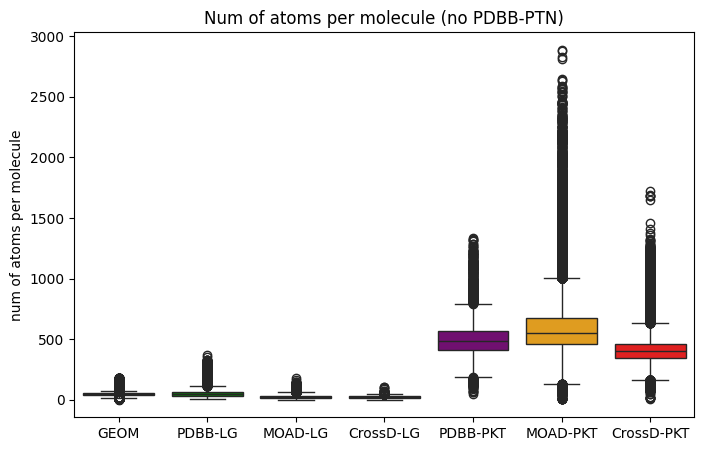

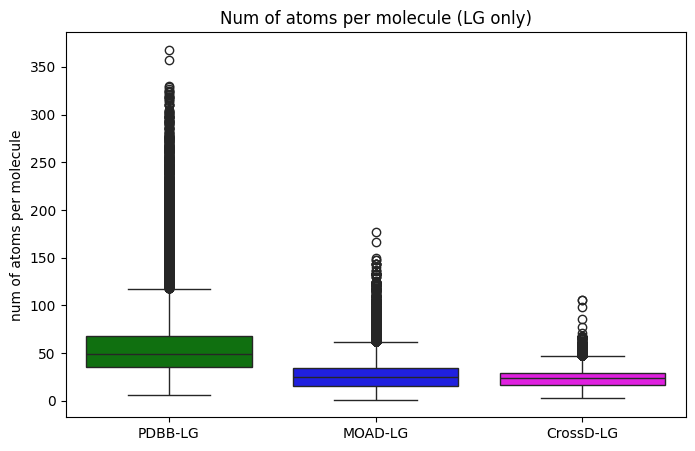

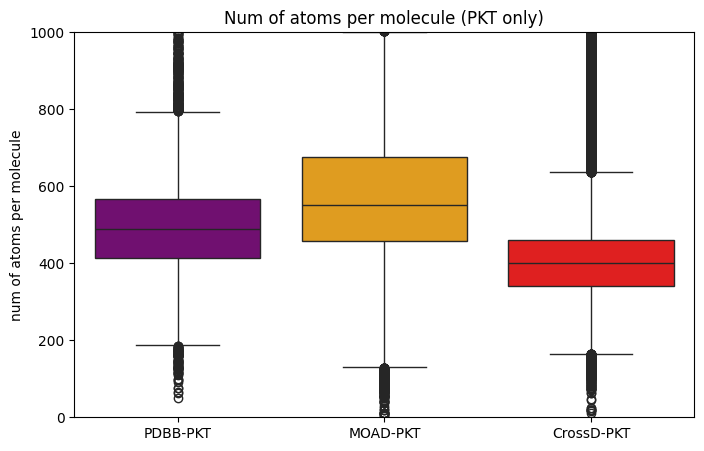

In [12]:
from utils import plot_combined_boxplot

# plot_combined_boxplot(data_num_atoms, colors, list_of_all_dicts_names[1:], ylabel='num of atoms per molecule', title='Num of atoms per molecule', img_save_path='outputs/num_atom_box_ALL.png')
plot_combined_boxplot(data_num_atoms[1:], colors[1:], list_of_all_dicts_names[1:], ylabel='num of atoms per molecule', title='Num of atoms per molecule (no PDBB-PTN)', img_save_path='outputs/num_atom_box_ALL_no_PDBB-PTN.png')

plot_combined_boxplot(data_num_atoms[2:5], colors[2:5], list_of_all_dicts_names[2:5], ylabel='num of atoms per molecule', title='Num of atoms per molecule (LG only)', img_save_path='outputs/num_atom_box_ALL_LG_only.png')
plot_combined_boxplot(data_num_atoms[5:], colors[5:], list_of_all_dicts_names[5:], ylabel='num of atoms per molecule', title='Num of atoms per molecule (PKT only)', img_save_path='outputs/num_atom_box_ALL_PKT_only.png', ymin=0, ymax=1000)



In [13]:
from utils import all_vs_all_welch_t_test

p_table_num_atom, t_table_num_atom = all_vs_all_welch_t_test(data_num_atoms[1:], list_of_all_dicts_names[1:], alpha=0.05)

print(p_table_num_atom, '\n\n', t_table_num_atom)

# save to txt file
with open('outputs/num_atom_stats_t_test.txt', 'w') as f:
    print(p_table_num_atom, file=f)
    print('\n\n', file=f)
    print(t_table_num_atom, file=f)


+----------------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
| (P) Alpha:0.05 |      GEOM |   PDBB-LG |   MOAD-LG | CrossD-LG |  PDBB-PKT |  MOAD-PKT | CrossD-PKT |
+----------------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|           GEOM |         - | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|        PDBB-LG | 0.0 (Sig) |         - | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|        MOAD-LG | 0.0 (Sig) | 0.0 (Sig) |         - | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|      CrossD-LG | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |         - | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|       PDBB-PKT | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |         - | 0.0 (Sig) |  0.0 (Sig) |
|       MOAD-PKT | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |         - |  0.0 (Sig) |
|     CrossD-PKT | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig)

### Molecule Size (Radius) Stats

In [14]:
from utils import get_min_max_mean_std

data_max_radius = [
   # qm9_data_obj.radius_max,
   None,
   geom_data_obj.radius_max,
   pdbbind_ligand_data_obj.radius_max,
   pdbbind_pocket_data_obj.radius_max,
   #    pdbbind_protein_data_obj.radius_max,
   moad_ligand_data_obj.radius_max,
   moad_pocket_data_obj.radius_max,
   crossd_ligand_data_obj.radius_max,
   crossd_pocket_data_obj.radius_max
]


min_mean_max_std_table = get_min_max_mean_std(data_max_radius[1:], list_of_all_dicts_names[1:])

print(min_mean_max_std_table)
# save to txt file
with open('outputs/radius_max_min_mean_max_std.txt', 'w') as f:
    print(min_mean_max_std_table, file=f)


+------------+-----+------+------+-----+
|            | Min | Mean |  Max | Std |
+------------+-----+------+------+-----+
|       GEOM | 0.8 |  6.8 | 20.6 | 1.2 |
|    PDBB-LG | 1.7 |  8.1 | 29.4 | 3.1 |
|    MOAD-LG | 8.8 | 18.4 | 42.5 | 2.3 |
|  CrossD-LG | 0.0 |  6.6 | 28.7 | 2.8 |
|   PDBB-PKT | 1.9 | 19.7 | 79.9 | 2.6 |
|   MOAD-PKT | 1.2 |  6.1 | 15.8 | 1.9 |
| CrossD-PKT | 3.9 | 17.0 | 28.0 | 1.8 |
+------------+-----+------+------+-----+


In [15]:
# from utils import plot_histogram

# # plot_histogram(data_list=qm9_data_obj.radius_max, color=colors[0], label=list_of_all_dicts_names[1:][0], xlabel='max radius of molecules', title='QM9 max radius of molecules', img_save_path='outputs/radius_max_hist_QM9.png')
# plot_histogram(data_list=geom_data_obj.radius_max, color=colors[1], label=list_of_all_dicts_names[1], xlabel='max radius of molecules', title='GEOM max radius of molecules', img_save_path='outputs/radius_max_hist_GEOM.png')

# plot_histogram(data_list=pdbbind_ligand_data_obj.radius_max, color=colors[2], label=list_of_all_dicts_names[2], xlabel='max radius of molecules', title='PDBB-LG max radius of molecules', img_save_path='outputs/radius_max_hist_PDBB-LG.png')
# plot_histogram(data_list=moad_ligand_data_obj.radius_max, color=colors[3], label=list_of_all_dicts_names[3], xlabel='max radius of molecules', title='MOAD-LG max radius of molecules', img_save_path='outputs/radius_max_hist_MOAD-LG.png')
# plot_histogram(data_list=crossd_ligand_data_obj.radius_max, color=colors[4], label=list_of_all_dicts_names[4], xlabel='max radius of molecules', title='CrossD-LG max radius of molecules', img_save_path='outputs/radius_max_hist_CrossD-LG.png', log=True)

# plot_histogram(data_list=pdbbind_pocket_data_obj.radius_max, color=colors[5], label=list_of_all_dicts_names[5], xlabel='max radius of molecules', title='PDBB-PKT max radius of molecules', img_save_path='outputs/radius_max_hist_PDBB-PKT.png', log=True)
# plot_histogram(data_list=moad_pocket_data_obj.radius_max, color=colors[6], label=list_of_all_dicts_names[6], xlabel='max radius of molecules', title='MOAD-PKT max radius of molecules', img_save_path='outputs/radius_max_hist_MOAD-PKT.png', log=True)
# plot_histogram(data_list=crossd_pocket_data_obj.radius_max, color=colors[7], label=list_of_all_dicts_names[7], xlabel='max radius of molecules', title='CrossD-PKT max radius of molecules', img_save_path='outputs/radius_max_hist_CrossD-PKT.png', log=True)

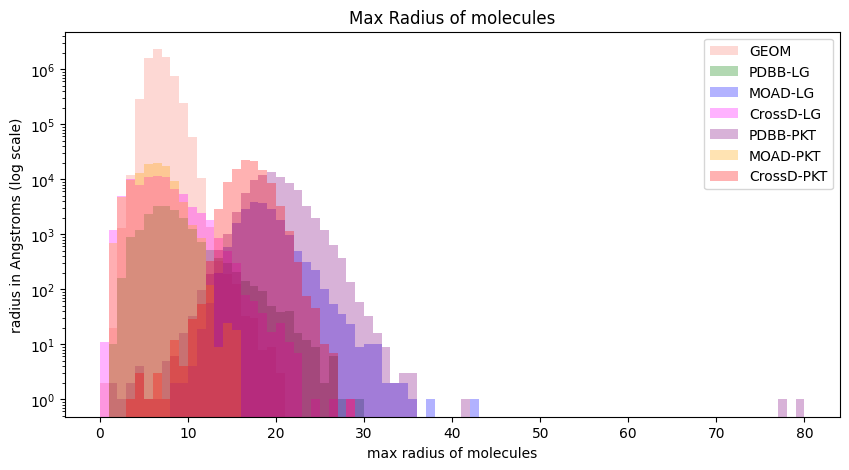

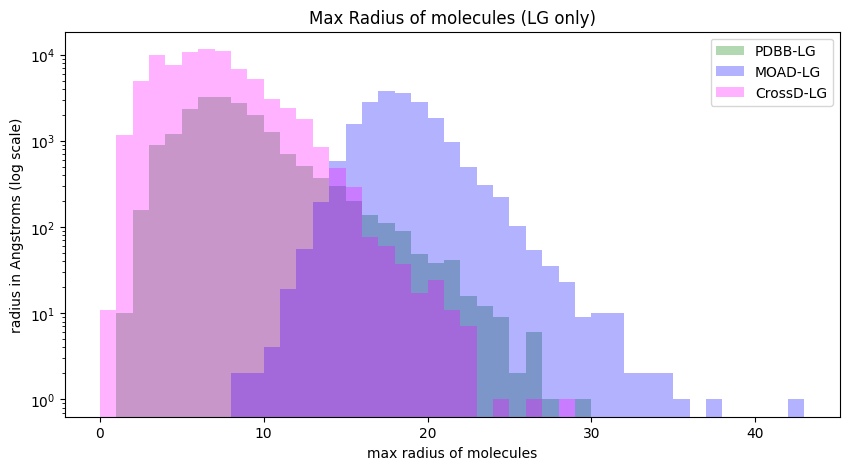

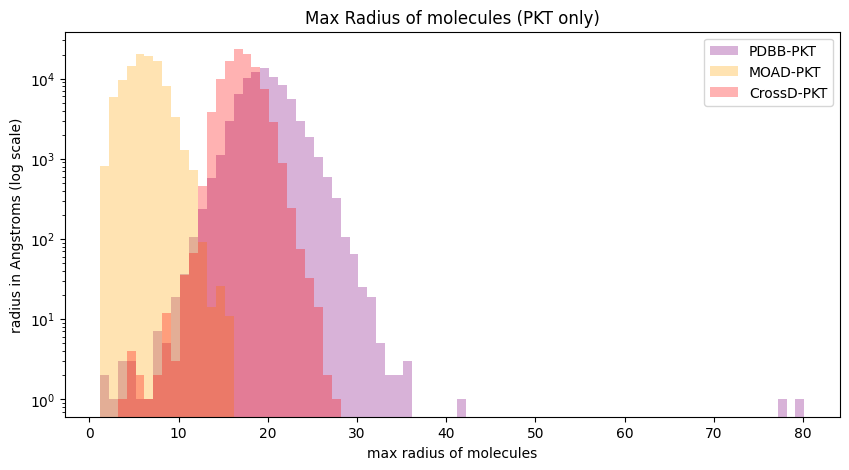

In [16]:
# this might take some time (PDBB-PTN)

from utils import plot_combined_histogram

plot_combined_histogram(data_max_radius[1:], colors[1:], list_of_all_dicts_names[1:], title='Max Radius of molecules', xlabel='max radius of molecules', ylabel='radius in Angstroms', img_save_path='outputs/radius_max_hist_ALL.png', log=True)

plot_combined_histogram(data_max_radius[2:5], colors[2:5], list_of_all_dicts_names[2:5], title='Max Radius of molecules (LG only)', xlabel='max radius of molecules', ylabel='radius in Angstroms', img_save_path='outputs/radius_max_hist_LG_only.png', log=True)
plot_combined_histogram(data_max_radius[5:], colors[5:], list_of_all_dicts_names[5:], title='Max Radius of molecules (PKT only)', xlabel='max radius of molecules', ylabel='radius in Angstroms', img_save_path='outputs/radius_max_hist_PKT_only.png', log=True)



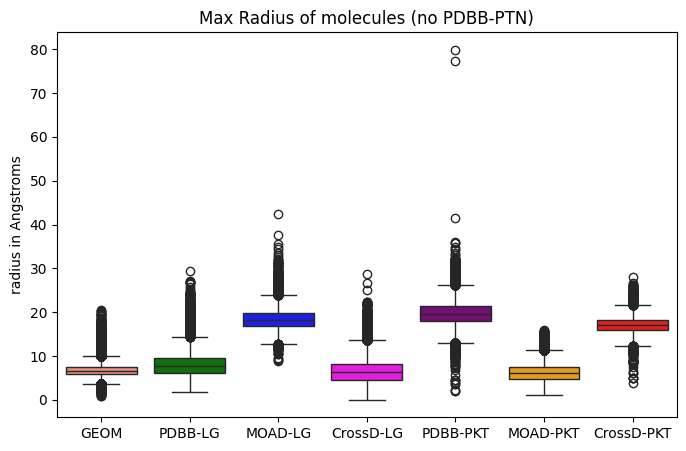

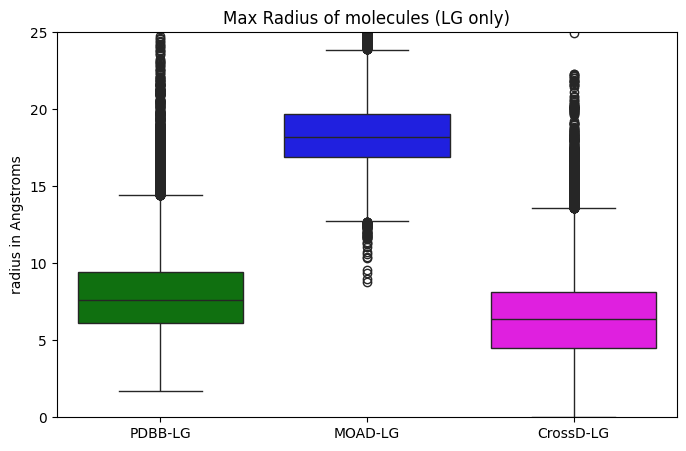

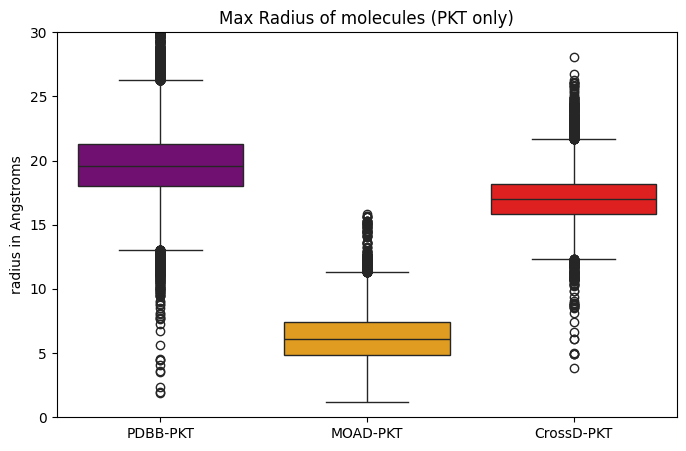

In [17]:
from utils import plot_combined_boxplot

# plot_combined_boxplot(data_max_radius, colors, list_of_all_dicts_names, ylabel='radius in Angstroms', title='Max Radius of molecules', img_save_path='outputs/radius_max_box_ALL.png')
plot_combined_boxplot(data_max_radius[1:], colors[1:], list_of_all_dicts_names[1:], ylabel='radius in Angstroms', title='Max Radius of molecules (no PDBB-PTN)', img_save_path='outputs/radius_max_box_ALL_no_PDBB-PTN.png')

plot_combined_boxplot(data_max_radius[2:5], colors[2:5], list_of_all_dicts_names[2:5], ylabel='radius in Angstroms', title='Max Radius of molecules (LG only)', img_save_path='outputs/radius_max_box_LG_only.png', ymin=0, ymax=25)
# plot_combined_boxplot(data_max_radius[4], [colors[4]], [list_of_all_dicts_names[4]], ylabel='radius in Angstroms', title='Max Radius of molecules (LG only)', img_save_path='outputs/radius_max_box_LG_only_2.png', ymin=0, ymax=400)

plot_combined_boxplot(data_max_radius[5:], colors[5:], list_of_all_dicts_names[5:], ylabel='radius in Angstroms', title='Max Radius of molecules (PKT only)', img_save_path='outputs/radius_max_box_PKT_only.png', ymin=0, ymax=30)


In [18]:
from utils import all_vs_all_welch_t_test

p_table_max_radius, t_table_mean_radius = all_vs_all_welch_t_test(data_max_radius[1:], list_of_all_dicts_names[1:], alpha=0.05)

print(p_table_max_radius, '\n\n', t_table_mean_radius)

# save to txt file
with open('outputs/radius_max_stats_t_test.txt', 'w') as f:
    print(p_table_max_radius, file=f)
    print('\n\n', file=f)
    print(t_table_mean_radius, file=f)


+----------------+-----------------------------+-----------+-----------+-----------------------------+-----------+-----------+------------+
| (P) Alpha:0.05 |                        GEOM |   PDBB-LG |   MOAD-LG |                   CrossD-LG |  PDBB-PKT |  MOAD-PKT | CrossD-PKT |
+----------------+-----------------------------+-----------+-----------+-----------------------------+-----------+-----------+------------+
|           GEOM |                           - | 0.0 (Sig) | 0.0 (Sig) | 3.358450692674144e-66 (Sig) | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|        PDBB-LG |                   0.0 (Sig) |         - | 0.0 (Sig) |                   0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|        MOAD-LG |                   0.0 (Sig) | 0.0 (Sig) |         - |                   0.0 (Sig) | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|      CrossD-LG | 3.358450692674144e-66 (Sig) | 0.0 (Sig) | 0.0 (Sig) |                           - | 0.0 (Sig) | 0.0 (Sig) |  0.0 (Sig) |
|       PDBB-PKT |  